In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import abc    #추상 클래스를 지원하는 패키지
import scipy.special    #erf을 지원하는 패키지

In [2]:
#모든 분포 함수의 기본 형태를 가지는 추상 클래스. Java의 인터페이스라고 생각하면 된다
class DistributionBase(metaclass=abc.ABCMeta):
    
    #Probability Density Function, 확률분포함수. 줄여서 PDF
    @abc.abstractmethod
    def PDF(self, x):
        pass
    
    #Cumulative Distribution Function, 누적분포함수. 줄여서 CDF
    @abc.abstractmethod
    def CDF(self, x):
        pass
    
    #각각의 분포에 해당하는 난수를 생성하는 함수
    @abc.abstractmethod
    def gen(self):
        pass

In [3]:
#uniform distribution class 선언
class Uniform(DistributionBase):
    
    #start, end : x의 범위
    def __init__(self, start, end):
        self.start=start
        self.end=end
    
    def PDF(self, x):
        if x<self.start or x>self.end:
            return 0
        else:
            return 1/(self.end-self.start)
    
    def CDF(self, x):
        if x<self.start:
            return 0
        elif self.start<=x or x<=self.end:
            return (x-self.start)/(self.end-self.start)
        else:
            return 1
    
    def gen(self):
        return random.random()*(self.end-self.start)+self.start

In [4]:
#exponential distribution class 선언
class Exponential(DistributionBase):
    
    #lamb는 람다. 파이썬에서 람다식을 지원하기 때문에 lambda라고는 못쓴다
    def __init__(self, lamb):
        self.lamb=lamb
    
    def PDF(self, x):
        if x>=0:
            return self.lamb*np.exp(-1*self.lamb*x)
        else:
            return 0
    
    def CDF(self, x):
        if x>=0:
            return 1-np.exp(-1*self.lamb*x)
        else:
            return 0
    
    def gen(self, y):
        return -1/self.lamb*np.log(1-y)

In [5]:
#gaussian distribution class 선언. 정규분포다.
class Gaussian(DistributionBase):
    
    #mean==평균, var==분산, deviation==표준편차
    def __init__(self, mean, var):
        self.mean=mean
        self.var=var
        self.deviation=var**0.5
        self.flag=True
        self.reserve=0.0
    
    def PDF(self, x):
        return 1/(self.deviation*np.sqrt(2*np.pi))*np.exp(-0.5*((x-self.mean)/self.deviation)**2)
    
    def CDF(self, x):
        return 0.5+0.5*scipy.special.erf((x-self.mean)/(np.sqrt(2)*self.deviation))    #erf : error function
    
    def gen(self):
        self.flag=True
        self.reserve=0.0
    
        if self.flag:
            r=np.sqrt(-2*(self.deviation**2)*np.log(1-random.random()))
            theta=2*np.pi*random.random()
            reserve=r*np.cos(theta)+self.mean
            self.flag=False
            return r*np.sin(theta)+self.mean
        else:
            self.flag=True
            return self.reserve

In [6]:
#loretnzian distribution class 선언. cauchy distribution이라고도 불린다.
class Lorentzian(DistributionBase):
    
    #median==중앙값. lorentzian distribution에서 평균은 정의되지 않는다.
    def __init__(self, gamma, median):
        self.gamma=gamma
        self.median=median
        self.flag=True
        self.reserve=0.0
    
    def PDF(self, x):
        return 1/(np.pi*self.gamma*(1+((x-self.median)/self.gamma)*((x-self.median)/self.gamma)))
    
    def CDF(self, x):
        return 1/np.pi*np.arctan((x-self.median)/2)+0.5
    
    def gen(self):
        return self.median+2*np.tan(np.pi*(random.random()-0.5))

In [7]:
#pareto distribution class 선언
class Pareto(DistributionBase):
    
    def __init__(self, alpha):
        self.alpha=alpha
    
    #이번 실험에서는 xm을 1로 둔다. xm은 상수이다.
    def PDF(self, x, xm=1):
        while True:
            try:
                ans=self.alpha*(xm**self.alpha)/(x**(self.alpha+1))
                break    #예외가 발생하지 않는 경우 반복문 탈출
            except ZeroDivisionError:    #0으로 나누는 경우가 발생할 경우
                pass    #반복문을 다시 돈다
        
        return ans
    
    def CDF(self, x, xm=1):
        return 1-(xm/x)**self.alpha
    
    def gen(self, xm=1):
        
        while True:
            try:
                ans=xm/np.sqrt(1-random.random())
                break    #예외가 발생하지 않는 경우 반복문 탈출
            except ZeroDivisionError:    #0으로 나누는 경우가 발생할 경우
                pass    #반복문을 다시 돈다
        
        return ans

In [8]:
def getMean(arr):
    mean=0
    for x in arr:
        mean+=x
    mean/=len(arr)
    
    return mean

In [9]:
def getVar(arr):
    var=0
    for x in arr:
        var+=x**2
    var-=getMean(arr)**2
    
    return mean

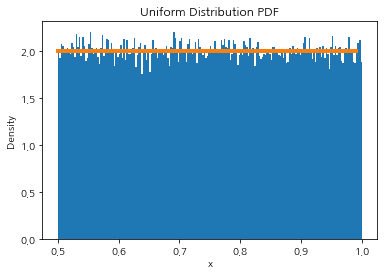

In [8]:
uni=Uniform(0.5, 1.0)    #x의 범위를 0.5, 1.0으로 잡음

result=list()
[result.append(uni.gen()) for i in range(100000)]
plt.hist(result, bins=200, density=True)

theory=list()
for x in np.arange(0.5,1,0.01):
    theory.append(uni.PDF(x))
plt.plot(np.arange(0.5,1.0,0.01),theory, linewidth=4)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Uniform Distribution PDF')
plt.show()

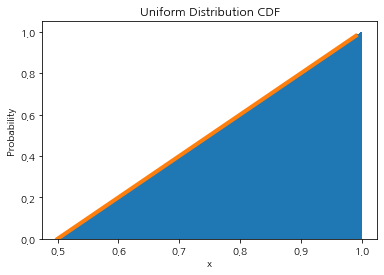

In [9]:
plt.hist(result, bins=200, density=True, cumulative=True)
theory=list()
for x in np.arange(0.5,1,0.01):
    theory.append(uni.CDF(x))
plt.plot(np.arange(0.5,1.0,0.01), theory, linewidth=4)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Uniform Distribution CDF')
plt.show()

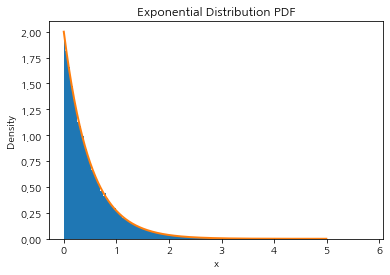

In [18]:
exp=Exponential(2)    #람다=2
result=list()
[result.append(exp.gen(random.random())) for i in range(100000)]
plt.hist(result, bins=200, density=True)

theory=list()
for x in np.arange(0,5,0.01):
    theory.append(exp.PDF(x))
plt.plot(np.arange(0,5,0.01), theory, linewidth=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Exponential Distribution PDF')
plt.show()

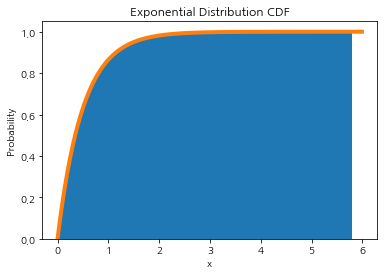

In [20]:
plt.hist(result, bins=200, density=True, cumulative=True)
theory=list()
for x in np.arange(0,6,0.01):
    theory.append(exp.CDF(x))
plt.plot(np.arange(0,6,0.01), theory, linewidth=4)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Exponential Distribution CDF')
plt.show()

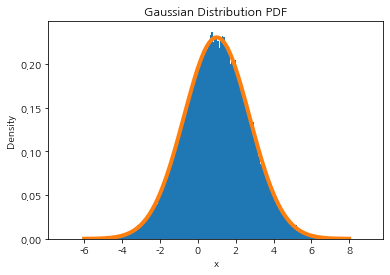

In [21]:
gauss=Gaussian(1, 3)
result=list()
[result.append(gauss.gen()) for i in range(100000)]
plt.hist(result,bins=200, density=True)

theory=list()
for x in np.arange(-6,8,0.01):
    theory.append(gauss.PDF(x))
plt.plot(np.arange(-6,8,0.01), theory, linewidth=4)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Gaussian Distribution PDF')
plt.show()

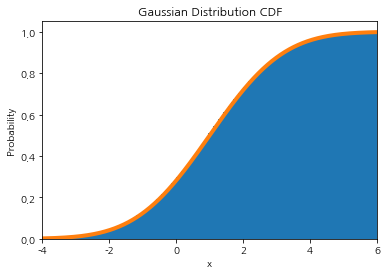

In [13]:
plt.hist(result, bins=200, density=True, cumulative=True)
theory=list()
for x in np.arange(-4,6,0.01):
    theory.append(gauss.CDF(x))
plt.plot(np.arange(-4,6,0.01), theory, linewidth=4)

plt.xlim(-4,6)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Gaussian Distribution CDF')
plt.show()

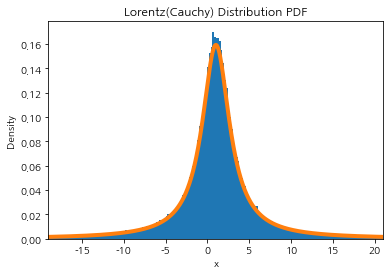

In [14]:
lorentz=Lorentzian(2,1)    #감마=2, 중앙값=1
result=list()
[result.append(lorentz.gen()) for i in range(100000)]
result=np.asfarray(result)
result = result[(result>-20+lorentz.median) & (result<20+lorentz.median)]    #-19 미만의 값과 21초과의 값을 잘라냄. 값이 너무 튀기 때문에 약간 잘라서 그래프가 원활하게 나오도록 한다.
plt.hist(result, bins=200, density=True)

theory=list()
for x in np.arange(-20+lorentz.median, 20+lorentz.median, 0.01):
    theory.append(lorentz.PDF(x))
plt.plot(np.linspace(-20+lorentz.median, 20+lorentz.median, len(theory)),theory, linewidth=4)

plt.xlim(-19,21)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Lorentz(Cauchy) Distribution PDF')
plt.show()

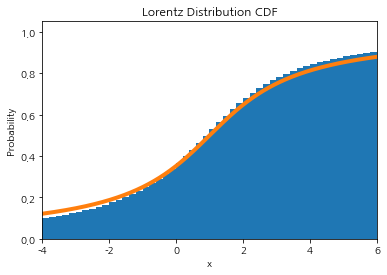

In [15]:
plt.hist(result, bins=200, density=True, cumulative=True)
theory=list()
for x in np.arange(-20+lorentz.median,20+lorentz.median,0.01):
    theory.append(lorentz.CDF(x))
plt.plot(np.arange(-20+lorentz.median,20+lorentz.median,0.01), theory, linewidth=4)

plt.xlim(-4,6)
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Lorentz Distribution CDF')
plt.show()

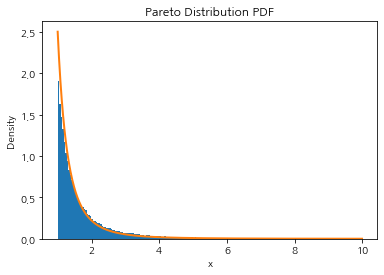

In [16]:
par=Pareto(2.5)
result=list()
[result.append(par.gen()) for i in range(100000)]
result=np.asfarray(result)
result=result[(result<10)]    #10 이상의 모든 값을 잘라냄. 너무 큰 값이 나오면 그래프가 잘 안나오기 때문에, 값을 잘라내어 그래프가 원활하게 나오도록 한다.
plt.hist(result, bins=200, density=True)

theory=list()
for x in np.arange(1,10,0.01):
    theory.append(par.PDF(x))
plt.plot(np.arange(1,10,0.01), theory, linewidth=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Pareto Distribution PDF')
plt.show()

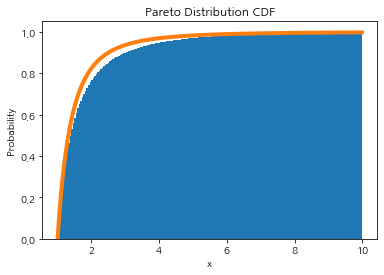

In [17]:
plt.hist(result, bins=200, density=True, cumulative=True)

theory=list()
for x in np.arange(1,10,0.01):
    theory.append(par.CDF(x))
plt.plot(np.arange(1,10,0.01), theory, linewidth=4)

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Pareto Distribution CDF')
plt.show()